In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:

transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.00002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.00002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:08, 14.13it/s]                         


Epoch 1 of 100
Generator loss: 0.58063339, Discriminator loss: 0.54394399


118it [00:08, 14.54it/s]                         


Epoch 2 of 100
Generator loss: 0.62866088, Discriminator loss: 0.61150264


118it [00:08, 14.21it/s]                         


Epoch 3 of 100
Generator loss: 0.87464627, Discriminator loss: 0.49650655


118it [00:08, 14.50it/s]                         


Epoch 4 of 100
Generator loss: 1.26306302, Discriminator loss: 0.33176009


118it [00:08, 14.34it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


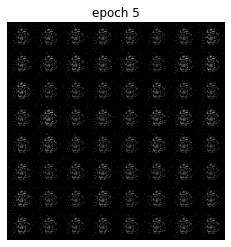

Epoch 5 of 100
Generator loss: 1.41254618, Discriminator loss: 0.27947976


118it [00:08, 14.40it/s]                         


Epoch 6 of 100
Generator loss: 1.08133630, Discriminator loss: 0.42695108


118it [00:08, 14.27it/s]                         


Epoch 7 of 100
Generator loss: 0.82261268, Discriminator loss: 0.64452924


118it [00:08, 14.47it/s]                         


Epoch 8 of 100
Generator loss: 1.02608544, Discriminator loss: 0.54090228


118it [00:08, 14.57it/s]                         


Epoch 9 of 100
Generator loss: 1.04897544, Discriminator loss: 0.49642389


118it [00:08, 14.59it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


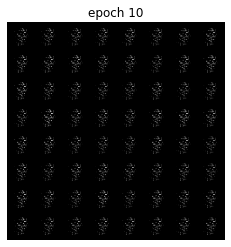

Epoch 10 of 100
Generator loss: 1.34671724, Discriminator loss: 0.37563338


118it [00:08, 14.40it/s]                         


Epoch 11 of 100
Generator loss: 1.71640044, Discriminator loss: 0.25134151


118it [00:08, 14.47it/s]                         


Epoch 12 of 100
Generator loss: 1.95681144, Discriminator loss: 0.18554240


118it [00:08, 14.52it/s]                         


Epoch 13 of 100
Generator loss: 1.93649864, Discriminator loss: 0.14337601


118it [00:08, 14.34it/s]                         


Epoch 14 of 100
Generator loss: 2.13444015, Discriminator loss: 0.10325504


118it [00:08, 14.21it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


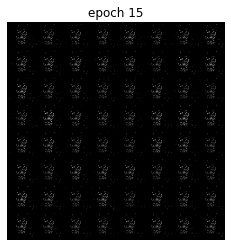

Epoch 15 of 100
Generator loss: 1.88792707, Discriminator loss: 0.25541186


118it [00:08, 14.07it/s]                         


Epoch 16 of 100
Generator loss: 3.02382091, Discriminator loss: 0.08397404


118it [00:08, 14.25it/s]                         


Epoch 17 of 100
Generator loss: 3.39772896, Discriminator loss: 0.06066076


118it [00:08, 14.29it/s]                         


Epoch 18 of 100
Generator loss: 3.51172958, Discriminator loss: 0.05911409


118it [00:08, 14.22it/s]                         


Epoch 19 of 100
Generator loss: 3.87623997, Discriminator loss: 0.06445428


118it [00:08, 14.48it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


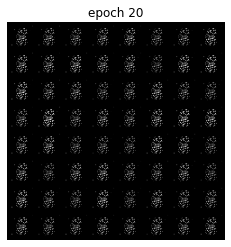

Epoch 20 of 100
Generator loss: 3.93116990, Discriminator loss: 0.09945407


118it [00:08, 13.96it/s]                         


Epoch 21 of 100
Generator loss: 3.93631803, Discriminator loss: 0.06104197


118it [00:08, 14.24it/s]                         


Epoch 22 of 100
Generator loss: 4.14967272, Discriminator loss: 0.03614550


118it [00:08, 14.17it/s]                         


Epoch 23 of 100
Generator loss: 4.18654891, Discriminator loss: 0.02318277


118it [00:08, 14.36it/s]                         


Epoch 24 of 100
Generator loss: 4.37645750, Discriminator loss: 0.01853588


118it [00:08, 13.98it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


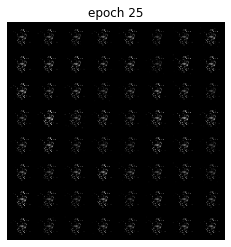

Epoch 25 of 100
Generator loss: 4.46396483, Discriminator loss: 0.04882156


118it [00:08, 14.28it/s]                         


Epoch 26 of 100
Generator loss: 4.41695383, Discriminator loss: 0.05893493


118it [00:08, 13.91it/s]                         


Epoch 27 of 100
Generator loss: 4.92203893, Discriminator loss: 0.02905520


118it [00:08, 13.37it/s]                         


Epoch 28 of 100
Generator loss: 5.46474468, Discriminator loss: 0.01629288


118it [00:08, 13.47it/s]                         


Epoch 29 of 100
Generator loss: 5.31228429, Discriminator loss: 0.01623501


118it [00:08, 13.57it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


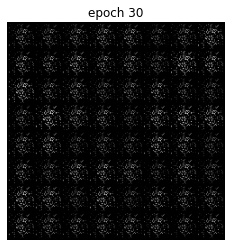

Epoch 30 of 100
Generator loss: 5.46176204, Discriminator loss: 0.01867110


118it [00:08, 13.31it/s]                         


Epoch 31 of 100
Generator loss: 5.55175804, Discriminator loss: 0.03253086


118it [00:08, 13.39it/s]                         


Epoch 32 of 100
Generator loss: 5.38590156, Discriminator loss: 0.02410136


118it [00:08, 13.51it/s]                         


Epoch 33 of 100
Generator loss: 5.90408171, Discriminator loss: 0.01274795


118it [00:08, 13.64it/s]                         


Epoch 34 of 100
Generator loss: 6.13411627, Discriminator loss: 0.01249407


118it [00:09, 13.05it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


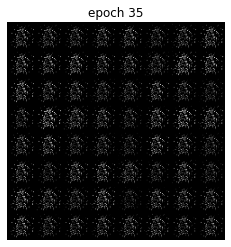

Epoch 35 of 100
Generator loss: 5.94745869, Discriminator loss: 0.01780731


118it [00:08, 13.22it/s]                         


Epoch 36 of 100
Generator loss: 6.09672690, Discriminator loss: 0.01984904


118it [00:08, 13.68it/s]                         


Epoch 37 of 100
Generator loss: 6.19374754, Discriminator loss: 0.01422609


118it [00:08, 13.45it/s]                         


Epoch 38 of 100
Generator loss: 6.58664353, Discriminator loss: 0.01073614


118it [00:08, 13.27it/s]                         


Epoch 39 of 100
Generator loss: 6.43315737, Discriminator loss: 0.01195287


118it [00:08, 13.66it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


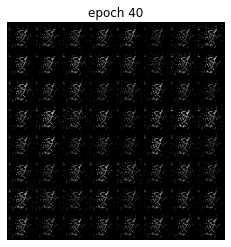

Epoch 40 of 100
Generator loss: 6.32518388, Discriminator loss: 0.01333071


118it [00:08, 13.56it/s]                         


Epoch 41 of 100
Generator loss: 6.20656379, Discriminator loss: 0.01091114


118it [00:08, 13.51it/s]                         


Epoch 42 of 100
Generator loss: 6.51614610, Discriminator loss: 0.00959312


118it [00:08, 13.24it/s]                         


Epoch 43 of 100
Generator loss: 6.84123166, Discriminator loss: 0.01202632


118it [00:08, 13.80it/s]                         


Epoch 44 of 100
Generator loss: 6.68973821, Discriminator loss: 0.01384923


118it [00:08, 13.50it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


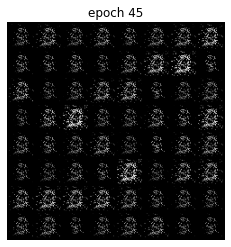

Epoch 45 of 100
Generator loss: 7.16618438, Discriminator loss: 0.01012735


118it [00:08, 13.51it/s]                         


Epoch 46 of 100
Generator loss: 7.15280007, Discriminator loss: 0.01285495


118it [00:08, 13.54it/s]                         


Epoch 47 of 100
Generator loss: 7.16104863, Discriminator loss: 0.01264345


118it [00:08, 13.82it/s]                         


Epoch 48 of 100
Generator loss: 7.08694636, Discriminator loss: 0.01129510


118it [00:08, 13.60it/s]                         


Epoch 49 of 100
Generator loss: 7.10908937, Discriminator loss: 0.00915019


118it [00:08, 13.61it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


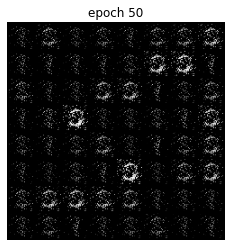

Epoch 50 of 100
Generator loss: 7.40994302, Discriminator loss: 0.00939106


118it [00:08, 13.92it/s]                         


Epoch 51 of 100
Generator loss: 7.57204421, Discriminator loss: 0.01276834


118it [00:08, 13.90it/s]                         


Epoch 52 of 100
Generator loss: 6.91158630, Discriminator loss: 0.01563336


118it [00:08, 13.44it/s]                         


Epoch 53 of 100
Generator loss: 7.09674436, Discriminator loss: 0.01097144


118it [00:08, 13.89it/s]                         


Epoch 54 of 100
Generator loss: 7.26441978, Discriminator loss: 0.00895906


118it [00:08, 13.97it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


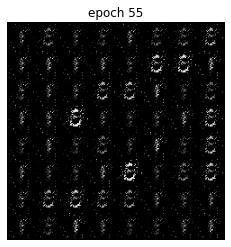

Epoch 55 of 100
Generator loss: 7.40410118, Discriminator loss: 0.00699865


118it [00:08, 13.98it/s]                         


Epoch 56 of 100
Generator loss: 7.48199074, Discriminator loss: 0.00849691


118it [00:08, 13.89it/s]                         


Epoch 57 of 100
Generator loss: 7.62458394, Discriminator loss: 0.00832696


118it [00:08, 13.92it/s]                         


Epoch 58 of 100
Generator loss: 7.87228283, Discriminator loss: 0.00752549


118it [00:08, 13.87it/s]                         


Epoch 59 of 100
Generator loss: 8.63282273, Discriminator loss: 0.00917679


118it [00:08, 13.90it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


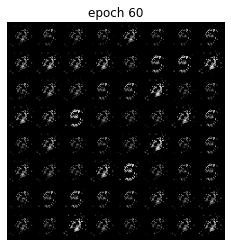

Epoch 60 of 100
Generator loss: 7.95816564, Discriminator loss: 0.01105126


118it [00:08, 14.06it/s]                         


Epoch 61 of 100
Generator loss: 7.73871553, Discriminator loss: 0.00997053


118it [00:08, 13.92it/s]                         


Epoch 62 of 100
Generator loss: 7.71287638, Discriminator loss: 0.00843484


118it [00:08, 13.92it/s]                         


Epoch 63 of 100
Generator loss: 8.15031148, Discriminator loss: 0.00688764


118it [00:08, 13.75it/s]                         


Epoch 64 of 100
Generator loss: 8.35446980, Discriminator loss: 0.00797047


118it [00:08, 13.58it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


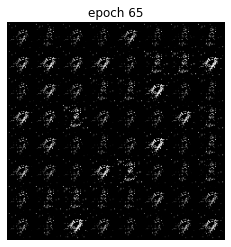

Epoch 65 of 100
Generator loss: 8.21845365, Discriminator loss: 0.00806414


118it [00:08, 13.88it/s]                         


Epoch 66 of 100
Generator loss: 8.33216540, Discriminator loss: 0.00746618


118it [00:08, 13.89it/s]                         


Epoch 67 of 100
Generator loss: 8.28357165, Discriminator loss: 0.00707342


118it [00:08, 13.96it/s]                         


Epoch 68 of 100
Generator loss: 8.48036228, Discriminator loss: 0.00616372


118it [00:08, 13.81it/s]                         


Epoch 69 of 100
Generator loss: 8.67616607, Discriminator loss: 0.00589439


118it [00:08, 13.68it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


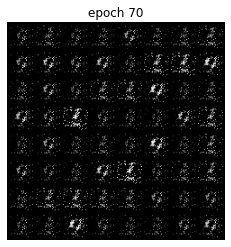

Epoch 70 of 100
Generator loss: 8.95351477, Discriminator loss: 0.00580932


118it [00:08, 13.95it/s]                         


Epoch 71 of 100
Generator loss: 9.16673818, Discriminator loss: 0.00639803


118it [00:08, 13.83it/s]                         


Epoch 72 of 100
Generator loss: 8.91694725, Discriminator loss: 0.00898516


118it [00:08, 13.43it/s]                         


Epoch 73 of 100
Generator loss: 8.78627930, Discriminator loss: 0.00893161


118it [00:08, 13.34it/s]                         


Epoch 74 of 100
Generator loss: 8.38772771, Discriminator loss: 0.00901755


118it [00:08, 13.73it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


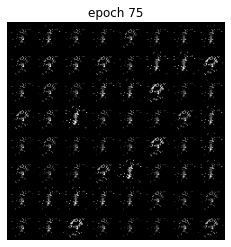

Epoch 75 of 100
Generator loss: 8.44843544, Discriminator loss: 0.00773758


118it [00:08, 13.68it/s]                         


Epoch 76 of 100
Generator loss: 8.61637691, Discriminator loss: 0.00577303


118it [00:08, 13.90it/s]                         


Epoch 77 of 100
Generator loss: 8.74181150, Discriminator loss: 0.00569687


118it [00:08, 13.60it/s]                         


Epoch 78 of 100
Generator loss: 8.97067520, Discriminator loss: 0.00571028


118it [00:08, 13.60it/s]                         


Epoch 79 of 100
Generator loss: 8.77816735, Discriminator loss: 0.00767718


118it [00:08, 13.84it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


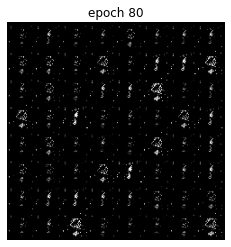

Epoch 80 of 100
Generator loss: 8.81783522, Discriminator loss: 0.00631212


118it [00:08, 13.59it/s]                         


Epoch 81 of 100
Generator loss: 8.91507359, Discriminator loss: 0.00663124


118it [00:08, 13.90it/s]                         


Epoch 82 of 100
Generator loss: 8.72963500, Discriminator loss: 0.00734143


118it [00:08, 14.01it/s]                         


Epoch 83 of 100
Generator loss: 8.48433045, Discriminator loss: 0.00848745


118it [00:08, 13.95it/s]                         


Epoch 84 of 100
Generator loss: 8.66185557, Discriminator loss: 0.00845766


118it [00:08, 14.05it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


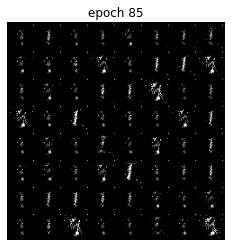

Epoch 85 of 100
Generator loss: 8.29088623, Discriminator loss: 0.00888485


118it [00:08, 13.83it/s]                         


Epoch 86 of 100
Generator loss: 8.10031962, Discriminator loss: 0.01067077


118it [00:08, 13.79it/s]                         


Epoch 87 of 100
Generator loss: 8.30484629, Discriminator loss: 0.01084281


118it [00:08, 13.91it/s]                         


Epoch 88 of 100
Generator loss: 7.84720832, Discriminator loss: 0.01621311


118it [00:08, 13.47it/s]                         


Epoch 89 of 100
Generator loss: 7.45077356, Discriminator loss: 0.01321655


118it [00:08, 13.86it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


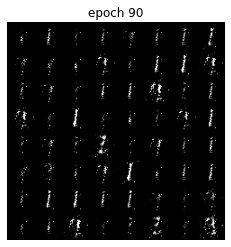

Epoch 90 of 100
Generator loss: 7.29066085, Discriminator loss: 0.01456970


118it [00:08, 13.75it/s]                         


Epoch 91 of 100
Generator loss: 7.82071180, Discriminator loss: 0.01319356


118it [00:08, 13.53it/s]                         


Epoch 92 of 100
Generator loss: 7.78412867, Discriminator loss: 0.01141198


118it [00:08, 13.69it/s]                         


Epoch 93 of 100
Generator loss: 7.51743444, Discriminator loss: 0.01477648


118it [00:08, 13.92it/s]                         


Epoch 94 of 100
Generator loss: 7.31330870, Discriminator loss: 0.01304793


118it [00:08, 13.93it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


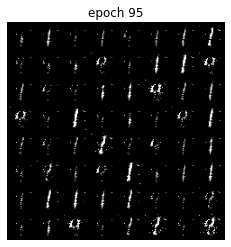

Epoch 95 of 100
Generator loss: 7.31288490, Discriminator loss: 0.01529348


118it [00:08, 14.03it/s]                         


Epoch 96 of 100
Generator loss: 7.53971886, Discriminator loss: 0.01392419


118it [00:08, 14.03it/s]                         


Epoch 97 of 100
Generator loss: 7.10218453, Discriminator loss: 0.01827638


118it [00:08, 13.78it/s]                         


Epoch 98 of 100
Generator loss: 6.90567226, Discriminator loss: 0.01752506


118it [00:08, 14.08it/s]                         


Epoch 99 of 100
Generator loss: 7.25713634, Discriminator loss: 0.01779946


118it [00:08, 14.13it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


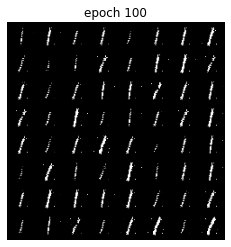

Epoch 100 of 100
Generator loss: 6.78688955, Discriminator loss: 0.02319238


In [14]:
torch.manual_seed(1000)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
    
        realImg,_ = data
        realImg = realImg.view(-1, 28*28).to(device)

        lblR = label_real(realImg.shape[0])
        lblF = label_fake(realImg.shape[0])

        noiseSamp = create_noise(realImg.shape[0], nz)
        fakeImg = generator(noiseSamp)

        discR = discriminator(realImg)
        lossR = discriminator_loss(discR, lblR)
        discF = discriminator(fakeImg)
        lossF = discriminator_loss(discF, lblF)

        lossDiscTotal = (lossR + lossF) / 2
        loss_d += lossDiscTotal.item()

        discriminator.zero_grad()
        lossDiscTotal.backward(retain_graph = True)
        optim_d.step()

        discF_new = discriminator(fakeImg)

        lossGen = generator_loss(discF_new, lblR)
        loss_g += lossGen.item()
        
        generator.zero_grad()
        lossGen.backward()
        optim_g.step()
        
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

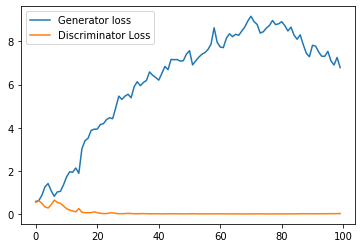

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')